In [131]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import networkx as nx 
from scipy.stats import ks_2samp


In [150]:
#Load in count distributions

and_dist = np.genfromtxt('and_agg_countdata.csv', delimiter=',')
or_dist = np.genfromtxt('or_agg_countdata.csv', delimiter=',')
null_dist59 = np.genfromtxt('59random_agg_countdata.csv', delimiter=',')
null_dist32 = np.genfromtxt('32random_agg_countdata.csv', delimiter=',')

In [152]:
#Pick out maximally represented motifs

print('3 in or :',np.where(or_dist==3.0)[0])
#print('1',np.where(and_dist==1.0))

print('2 in and:', np.where(and_dist==2.0)[0])

print('3 in random:', np.where(null_dist32==3.0)[0])

3 in or : [ 466  821 1103 2212]
2 in and: [ 154  163  788  974 1166 1285 1430 2028 2055 2592 3011 3169]
3 in random: []


In [ ]:
#Do the OR motifs show up in the larger OR circuits?


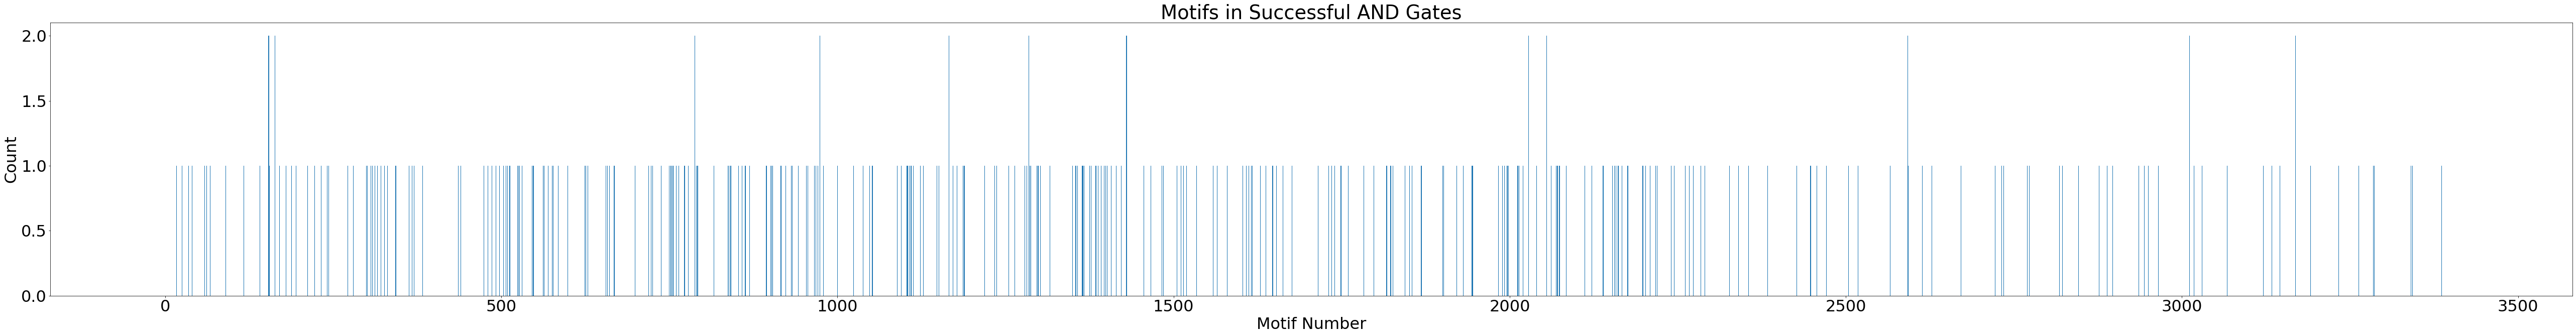

In [215]:
#Plot histograms

#np.histogram(and_dist)
plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(90, 10))
plt.bar(np.arange(0,len(and_dist),1),and_dist)
plt.title("Motifs in Successful AND Gates")
plt.plot
plt.xlabel('Motif Number')
plt.ylabel('Count')
plt.show()

In [115]:
#Calculate excitatory:inhibitory:absent ratio (used to generate the random graphs)

andgenomes = np.genfromtxt('andgenomes.csv',delimiter=',')
andedges = 25*len(andgenomes)
orgenomes = np.genfromtxt('orgenomes.csv',delimiter=',')
oredges = 25*len(orgenomes)

and0s = len(np.where(andgenomes==0.)[0])
print('and0s',and0s/andedges)
and1s = len(np.where(andgenomes==1.)[0])
print('and1s',and1s/andedges)
andneg1s = len(np.where(andgenomes==-1.)[0])
print('and-1s',andneg1s/andedges)
or0s = len(np.where(orgenomes==0.)[0])
print('or0s',or0s/oredges)
or1s = len(np.where(orgenomes==1.)[0])
print('or1s',or1s/oredges)
orneg1s = len(np.where(orgenomes==-1.)[0])
print('or-1s',orneg1s/oredges)

print('overall 0s:', (and0s + or0s)/(andedges+oredges))

print('overall 1s:',(and1s + or1s)/(andedges+oredges))

print('overall -1s:',(andneg1s + orneg1s)/(andedges+oredges))

and0s 0.3025
and1s 0.33
and-1s 0.3675
or0s 0.3193220338983051
or1s 0.31457627118644066
or-1s 0.36610169491525424
overall 0s: 0.3134065934065934
overall 1s: 0.32
overall -1s: 0.3665934065934066


In [151]:
###STATISTICAL TESTS

#translate aggregate count data into a sample where each detected motif is an element
andaggmotifcounts = list(np.tile(np.where(and_dist==2.0)[0],2))+list(np.where(and_dist==1.0)[0])
oraggmotifcounts = list(np.tile(np.where(or_dist==3.0)[0],3))+ list(np.tile(np.where(or_dist==2.0)[0],2))+list(np.where(or_dist==1.0)[0])
totalaggmotifcounts = andaggmotifcounts + oraggmotifcounts 
null59aggmotifcounts = list(np.tile(np.where(null_dist59==3.0)[0],3))+ list(np.tile(np.where(null_dist59==2.0)[0],2))+list(np.where(null_dist59==1.0)[0])
null32aggmotifcounts = list(np.tile(np.where(null_dist32==3.0)[0],3))+ list(np.tile(np.where(null_dist32==2.0)[0],2))+list(np.where(null_dist32==1.0)[0])
test = null59aggmotifcounts + null32aggmotifcounts
#null91aggmotifcounts = list(np.tile(np.where(null_dist91==3.0)[0],3))+ list(np.tile(np.where(null_dist91==2.0)[0],2))+list(np.where(null_dist91==1.0)[0])
null59aggmotifcounts = np.array(null59aggmotifcounts)
null32aggmotifcounts = np.array(null32aggmotifcounts)
#null91aggmotifcounts = np.array(null91aggmotifcounts)
andaggmotifcounts = np.array(andaggmotifcounts)
oraggmotifcounts = np.array(oraggmotifcounts)
totalaggmotifcounts = np.array(totalaggmotifcounts)
#Test whether each distribution is significantly different from random
print('and/null32 p-value =', ks_2samp(null32aggmotifcounts,andaggmotifcounts)[1])
print('or/null59 p-value =', ks_2samp(null59aggmotifcounts,oraggmotifcounts)[1])
print('aggregate/null91 p-value =', )

#Test whether each distribution is significantly different from each other
print('and/or p-value =', ks_2samp(andaggmotifcounts,oraggmotifcounts)[1])


and/null32 p-value = 0.17260145401971483
or/null59 p-value = 0.040237895678452186
aggregate/null91 p-value =
and/or p-value = 0.27512135792227055


In [213]:
ormotifclasses = np.array([247, 286, 289, 316, 319, 633, 704, 707, 775, 778, 870, 871, 893, 894, 918, 1373, 1418, 1419, 1437, 1440, 1504, 1676, 1679, 1715, 2053])
uniformdist = np.arange(3411)
print(uniformdist[-1])
sample1 = np.random.choice(uniformdist,size=len(ormotifclasses))
sample2 = np.random.choice(uniformdist,size=len(ormotifclasses))
print(ks_2samp(ormotifclasses,sample1)[1])
print(ks_2samp(sample1,sample2)[1])

3410
0.001920719384568105
0.4754535018190584
